In [1]:
import numpy as np 
import pandas as pd

In [2]:
df = pd.read_csv('sales_data.csv')
df.head()

,Date,Product,Quantity,Price,Customer_ID,Region,Total_Sales
0,2024-01-01,Phone,7,37300,CUST001,East,261100
1,2024-01-02,Headphones,4,15406,CUST002,North,61624
2,2024-01-03,Phone,2,21746,CUST003,West,43492
3,2024-01-04,Headphones,1,30895,CUST004,East,30895
4,2024-01-05,Laptop,8,39835,CUST005,North,318680


In [3]:
df.tail()

,Date,Product,Quantity,Price,Customer_ID,Region,Total_Sales
95,2024-04-05,Tablet,8,20770,CUST096,North,166160
96,2024-04-06,Headphones,1,7647,CUST097,West,7647
97,2024-04-07,Tablet,5,27196,CUST098,East,135980
98,2024-04-08,Monitor,1,30717,CUST099,North,30717
99,2024-04-09,Headphones,5,23376,CUST100,South,116880


Step 1 is to convert the data types - Date

In [4]:
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         100 non-null    datetime64[ns]
 1   Product      100 non-null    object        
 2   Quantity     100 non-null    int64         
 3   Price        100 non-null    int64         
 4   Customer_ID  100 non-null    object        
 5   Region       100 non-null    object        
 6   Total_Sales  100 non-null    int64         
dtypes: datetime64[ns](1), int64(3), object(3)
memory usage: 5.6+ KB


Step 2 - Adding a columns of calculated Revenue, Month and Day

In [8]:
df['Revenue'] = df['Quantity'] * df['Price']

In [9]:
df['Month'] = df['Date'].dt.to_period('M')

In [11]:
df['Day'] = df['Date'].dt.day_name()

In [13]:
df.head(10)

,Date,Product,Quantity,Price,Customer_ID,Region,Total_Sales,Revenue,Month,Day
0,2024-01-01,Phone,7,37300,CUST001,East,261100,261100,2024-01,Monday
1,2024-01-02,Headphones,4,15406,CUST002,North,61624,61624,2024-01,Tuesday
2,2024-01-03,Phone,2,21746,CUST003,West,43492,43492,2024-01,Wednesday
3,2024-01-04,Headphones,1,30895,CUST004,East,30895,30895,2024-01,Thursday
4,2024-01-05,Laptop,8,39835,CUST005,North,318680,318680,2024-01,Friday
5,2024-01-06,Laptop,7,40420,CUST006,South,282940,282940,2024-01,Saturday
6,2024-01-07,Laptop,9,40430,CUST007,South,363870,363870,2024-01,Sunday
7,2024-01-08,Laptop,7,7262,CUST008,West,50834,50834,2024-01,Monday
8,2024-01-09,Tablet,3,32791,CUST009,North,98373,98373,2024-01,Tuesday
9,2024-01-10,Laptop,4,45023,CUST010,West,180092,180092,2024-01,Wednesday


Step 3 - Calculating of overall sales performance 

In [15]:
total_revenue = df['Revenue'].sum()
print(f"The total revenue of the sales are = {total_revenue}")

The total revenue of the sales are = 12365048


In [17]:
total_orders = len(df)
print(f"Total orders we get  = {total_orders}")

Total orders we get  = 100


In [18]:
unique_customers = df['Customer_ID'].nunique()
print(f"The unique customers are = {unique_customers}")

The unique customers are = 100


Step 4 - Top and Worst products 

In [21]:
product_sales = (df.groupby('Product')['Revenue'].sum().sort_values(ascending=False))
print(f"The top and worst products are = {product_sales}")

The top and worst products are = Product
Laptop        3889210
Tablet        2884340
Phone         2859394
Headphones    1384033
Monitor       1348071
Name: Revenue, dtype: int64


Step 5 - Identify the regional performance of the product 

In [25]:
regional_sales = (df.groupby('Region')['Revenue'].sum().sort_values(ascending= False))
print(f"The sales in region are = {regional_sales}")

The sales in region are = Region
North    3983635
South    3737852
East     2519639
West     2123922
Name: Revenue, dtype: int64


Step 6 - Customer value analysis

In [29]:
customer_sales = (df.groupby('Customer_ID')['Revenue'].sum().sort_values(ascending=False))
customer_sales

Customer_ID
CUST016    373932
CUST007    363870
CUST083    350888
CUST073    349510
CUST020    333992
            ...  
CUST058     10544
CUST097      7647
CUST091      7148
CUST048      6720
CUST054      6540
Name: Revenue, Length: 100, dtype: int64

Step 7 - Time Based Trends

In [30]:
monthly_sales = (df.groupby('Month')['Revenue'].sum())
monthly_sales

Month
2024-01    4120524
2024-02    2656050
2024-03    4485006
2024-04    1103468
Freq: M, Name: Revenue, dtype: int64

Step 8 - Visualize the Data

In [32]:
import matplotlib.pyplot as plt 
import seaborn as sns

In [34]:
product_sales = (
    df.groupby('Product')['Revenue']
    .sum()
    .reset_index()
    .sort_values('Revenue', ascending=False)
)

C:\Users\Suraj Singh\AppData\Local\Temp\ipykernel_8580\1690838842.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


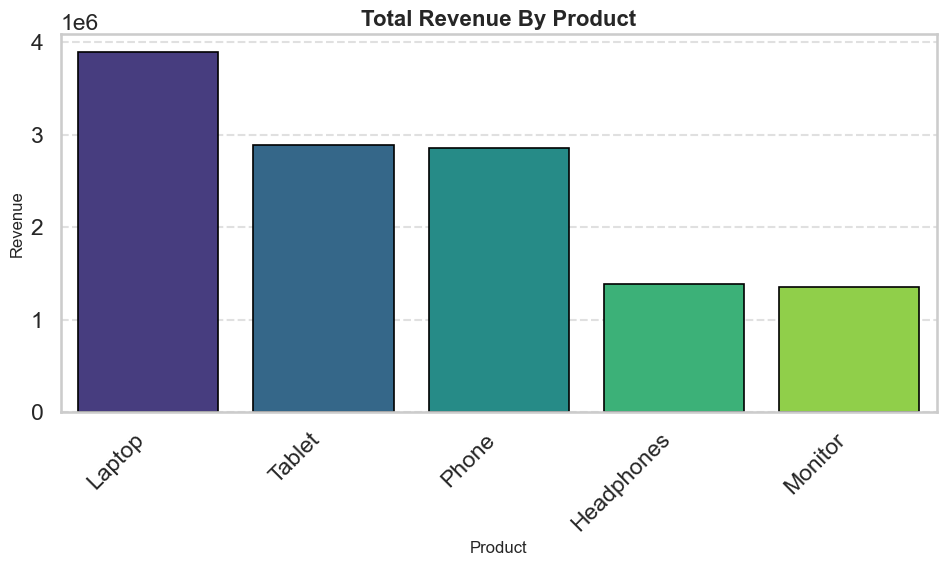

In [46]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=product_sales,
    x='Product',
    y='Revenue',
    palette='viridis',     
    edgecolor='black',     
    linewidth=1.2,
    saturation=0.9
)
plt.title("Total Revenue By Product", fontsize = 16, fontweight = 'bold')
plt.xlabel('Product', fontsize = 12)
plt.ylabel('Revenue', fontsize = 12)
plt.xticks(rotation=45, ha='right')  # Readability
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

C:\Users\Suraj Singh\AppData\Local\Temp\ipykernel_8580\4128886502.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


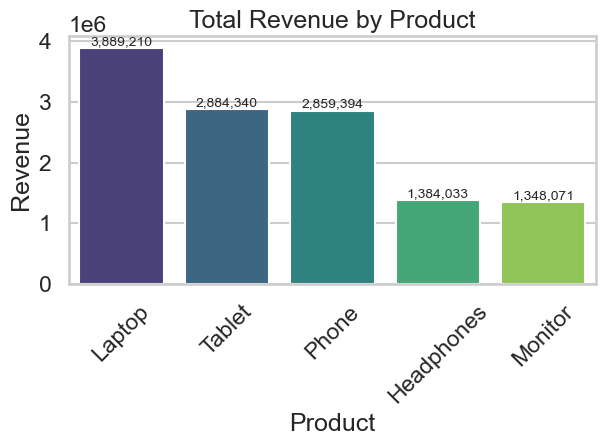

In [44]:
ax = sns.barplot(
    data=product_sales,
    x='Product',
    y='Revenue',
    palette='viridis'
)

for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height()):,}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='bottom',
        fontsize=10
    )

plt.xticks(rotation=45)
plt.title('Total Revenue by Product')
plt.tight_layout()
sns.set_theme(style='whitegrid', context='talk')

In [53]:
region_sales = (
    df.groupby('Region')['Revenue']
    .sum()
    .reset_index()
    .sort_values('Revenue', ascending=False)
)
region_sales

,Region,Revenue
1,North,3983635
2,South,3737852
0,East,2519639
3,West,2123922


C:\Users\Suraj Singh\AppData\Local\Temp\ipykernel_8580\3763492273.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


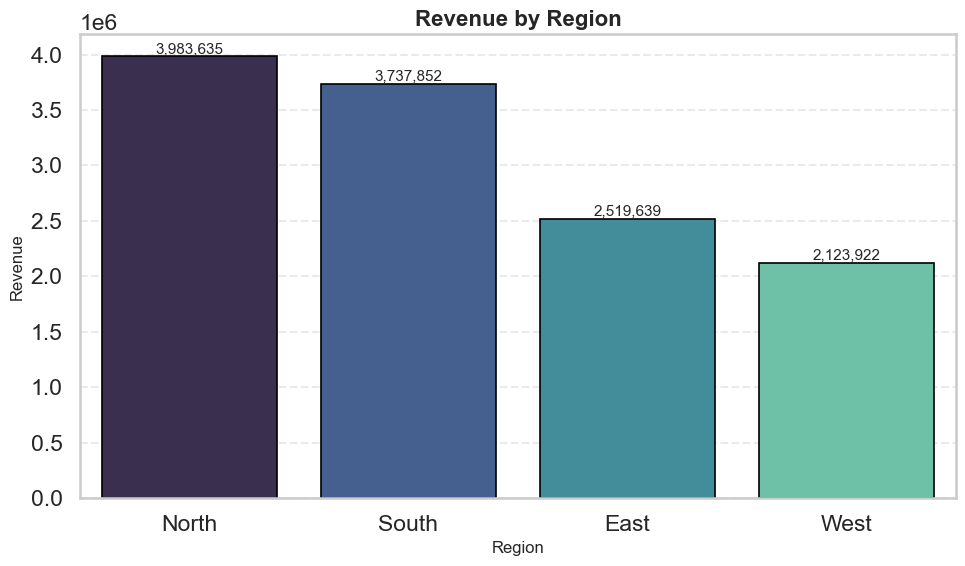

In [56]:
plt.figure(figsize=(10,6))
sns.set_theme(style='whitegrid', context='talk')

ax = sns.barplot(
    data=region_sales,
    x='Region',
    y='Revenue',
    palette='mako',        # Clean & corporate
    edgecolor='black',
    linewidth=1.2
)

plt.title(
    'Revenue by Region',
    fontsize=16,
    fontweight='bold'
)

plt.xlabel('Region', fontsize=12)
plt.ylabel('Revenue', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.4)

# Value labels
for p in ax.patches:
    ax.annotate(
        f'{int(p.get_height()):,}',
        (p.get_x() + p.get_width()/2., p.get_height()),
        ha='center',
        va='bottom',
        fontsize=11
    )

plt.tight_layout()
plt.show()


In [55]:
monthly_sales = (
    df.groupby(df['Date'].dt.to_period('M'))['Revenue']
    .sum()
    .reset_index()
)

monthly_sales['Date'] = monthly_sales['Date'].astype(str)
monthly_sales

,Date,Revenue
0,2024-01,4120524
1,2024-02,2656050
2,2024-03,4485006
3,2024-04,1103468


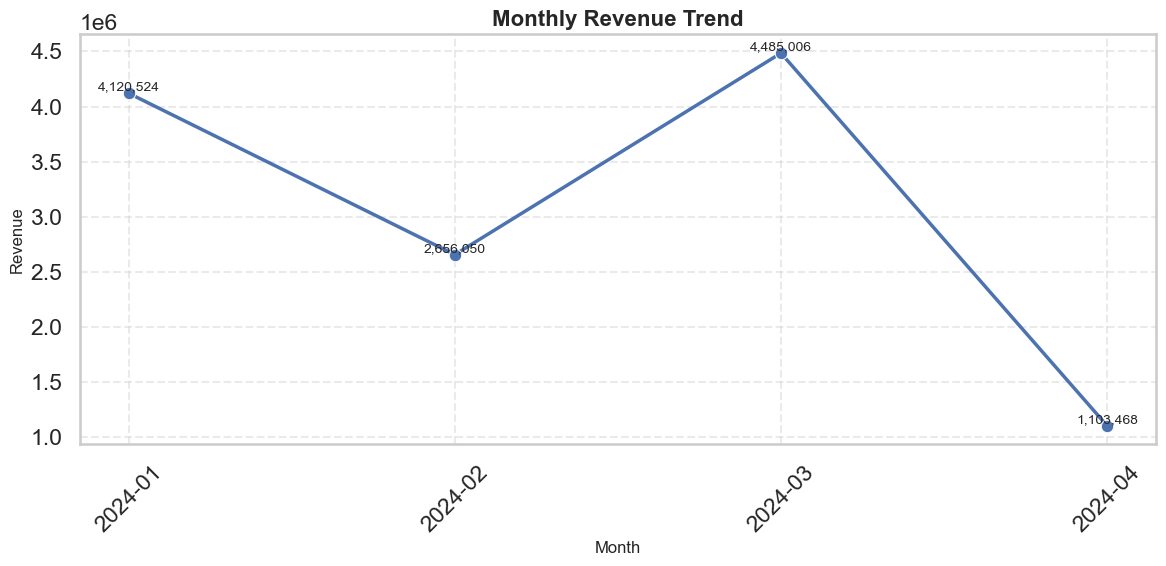

In [60]:
sns.set_theme(style='whitegrid', context='talk')
plt.figure(figsize=(12,6))

ax = sns.lineplot(
    data=monthly_sales,
    x='Date',
    y='Revenue',
    marker='o',
    linewidth=2.5
)

plt.title(
    'Monthly Revenue Trend',
    fontsize=16,
    fontweight='bold'
)

plt.xlabel('Month', fontsize=12)
plt.ylabel('Revenue', fontsize=12)

plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.4)

# Value labels
for x, y in zip(monthly_sales['Date'], monthly_sales['Revenue']):
    ax.text(x, y, f'{int(y):,}', ha='center', va='bottom', fontsize=10)
    

plt.tight_layout()

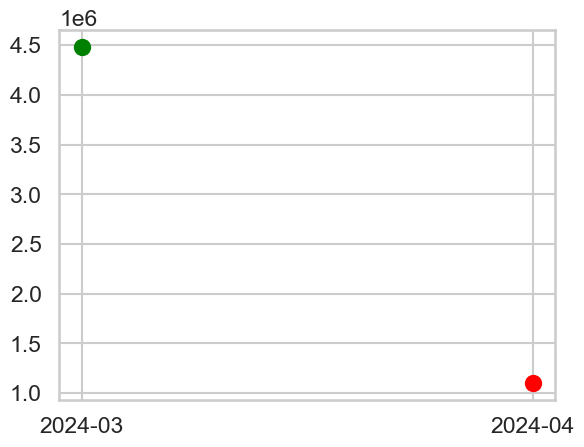

In [61]:
max_month = monthly_sales.loc[monthly_sales['Revenue'].idxmax()]
min_month = monthly_sales.loc[monthly_sales['Revenue'].idxmin()]

plt.scatter(max_month['Date'], max_month['Revenue'], color='green', s=120)
plt.scatter(min_month['Date'], min_month['Revenue'], color='red', s=120)

<Axes: xlabel='Date', ylabel='Rolling_Avg'>

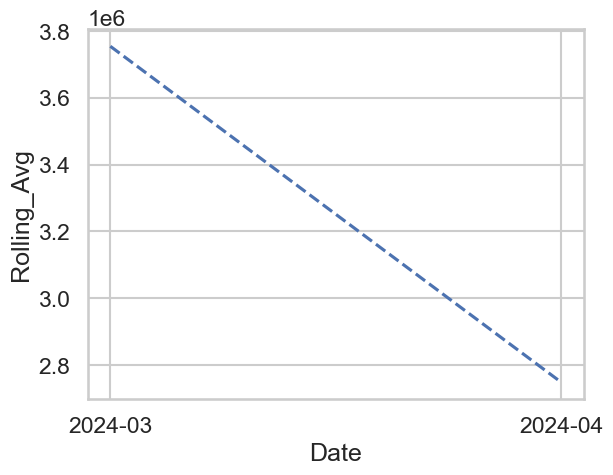

In [62]:
monthly_sales['Rolling_Avg'] = monthly_sales['Revenue'].rolling(3).mean()

sns.lineplot(
    data=monthly_sales,
    x='Date',
    y='Rolling_Avg',
    linestyle='--'
)
